# 필터링
### 영상 필터링
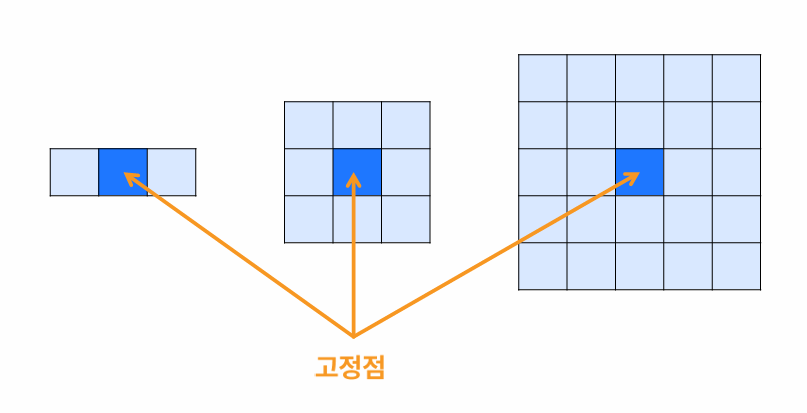
- 디지털 영상 중 유의미한 정보 or 관심 가질 내용만 걸러내는 작엄
- mask 이용해 필터링 수행 -> 다양한 크기와 모양으로 정의, 원소는 실수로 구성
- 필터링 대상 : 마스크 중앙에 위치 -> 고정점
- 연산 결과 : 마스크 행렬 모양과 원소값에 의해 결정
- 디저털 영상의 모든 픽셀 위로 마스크 행렬 이동시켜 연산 수행
    - 마스크 연산 : 마스크 행렬의 모든 원소에 대해 마스크 행렬 원소 값과 같은 위치에 있는 입력 영상 픽셀값 곱한 후, 그 결과 모두 연산
<br><br>

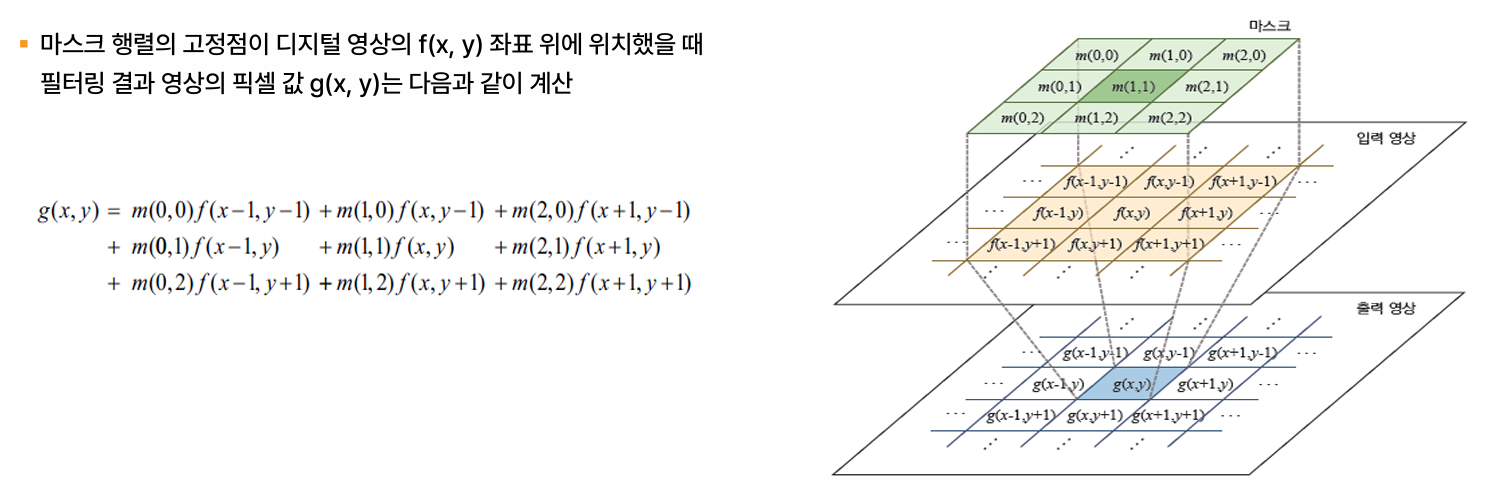
<br><br>

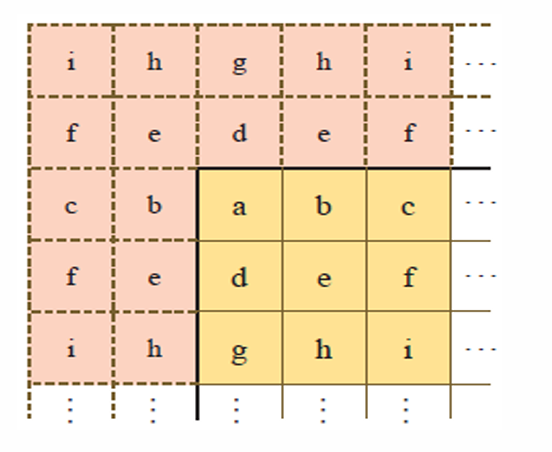
- 영상 가장자리 픽셀 : 주변에 픽셀 없는 공간 존재 -> 다른 방법 도입 필요
- 영상 확장 : 영상 바깥쪽 가상 픽셀 생성 (설정값 따라 결과 달라짐)
- 실선 노란색 공간 : 실제 존재 픽셀
- 점선 주황색 공간 : 필터링 연산 시 사용할 가상 픽셀

### 2D 필터링
- cv2.filter2D(src, ddepth, kernel, dst = None, anchor = None, delta = None, borderType = None)
    - src : 입력 영상
    - ddepth : 출력 영상 데이터 타입 -> cv2.CV_8U, cv2.CV_32F, cv2.CV_64F 등
        - -1 지정 : src와 같은 타입 dst 영상 생성
    - kernel : 필터 마스크 행렬(실수형)
    - anchor : 고정점 위치
        - (-1,-1) : 중앙 고정점 사용
    - delta : 추가 연산값
    - borderType : 가장자리 픽셀 확장 방식

In [ ]:
import cv2
import numpy as np

src = cv2.imread('./img/pier39.jpg',cv2.IMREAD_GRAYSCALE)
kernel = np.ones((3,3),dtype=np.float64)/9.
dst = cv2.filter2D(src,-1,kernel)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()


# 블러링(blurring)
- 영상을 부드럽게 만드는 기법 -> 흐린 느낌
- 인접 픽셀 간 차이 적을 경우 부드러운 느낌
<br><br>
- 용도
    - 거친 느김 입력 영상 부드럽게 만듦
    - 영상에 존재하는 잡음 영향 제거
<br><br>
- 블러링 기법
    - 평균값 필터, 가우시안 필터 사용
<br><br>


### 평균값 필터
- 디지털 영상에서 해당 픽셀과 주변 픽셀들 평균값을 픽셀값으로 설정
- 픽셀값의 급격한 변화 감소 -> 에지 무뎌짐, 잡음 영향 감소
- 과도하게 사용할 경우, 사물 경계 흐릿해지고 사물 구분 어려움
- cv2.blur(src, ksize, dst = None, anchor = None, borderType = None)
    - src : 입력 영상
    - ksize : 평균값 필터 크기 (width, height)
    - dst : 결과 영상
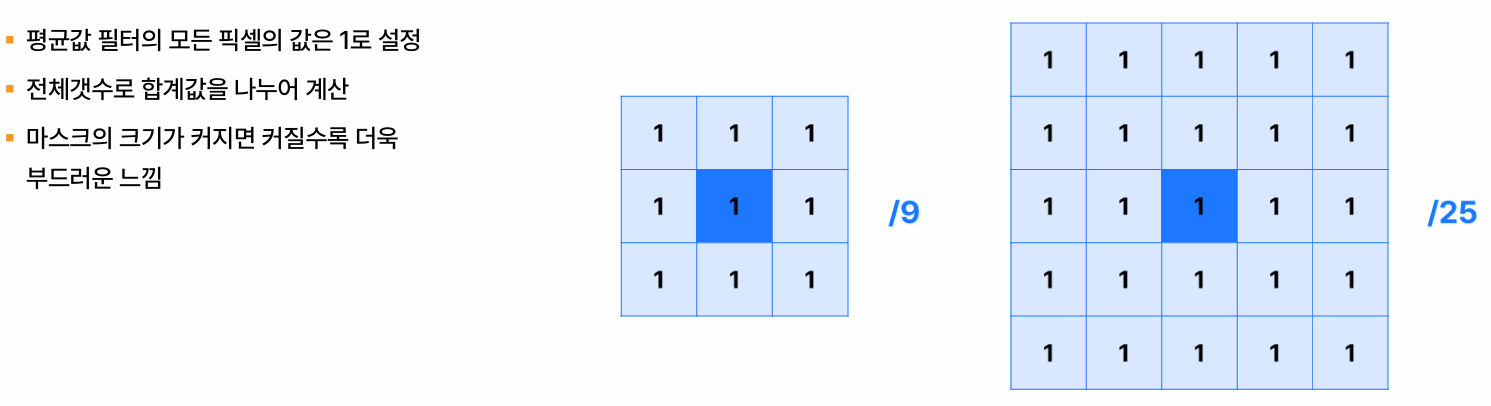

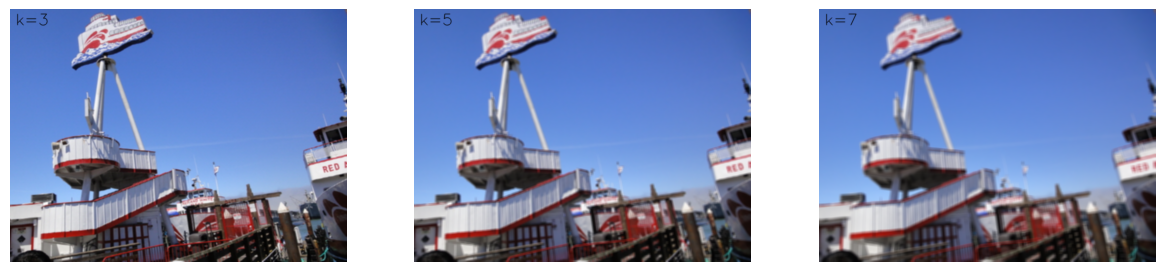

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./img/pier39.jpg')
plt.figure(figsize=(20, 5))

for i in range(1,4):
    k = i*2+1
    dst = cv2.blur(img, (k, k))
    desc = f'k={k}'
    cv2.putText(dst, desc, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 0, 1, cv2.LINE_AA)

    index = 140+i
    plt.subplot(index)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

### 가우시안 필터
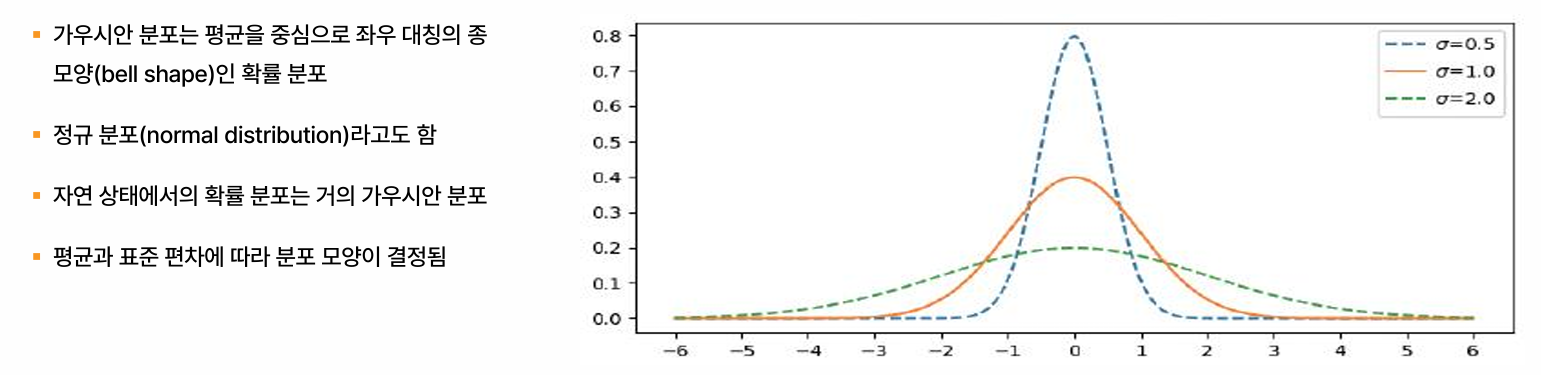
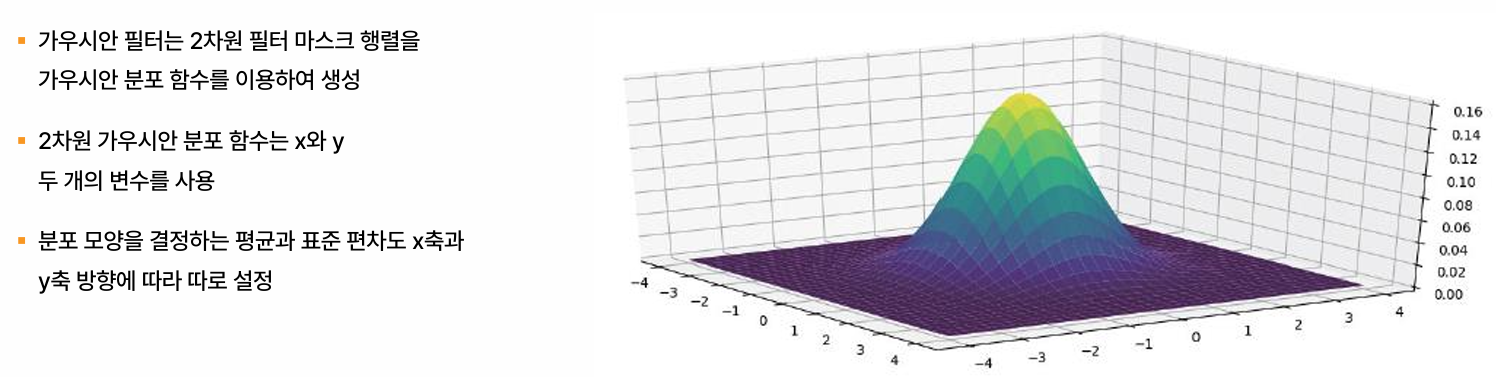
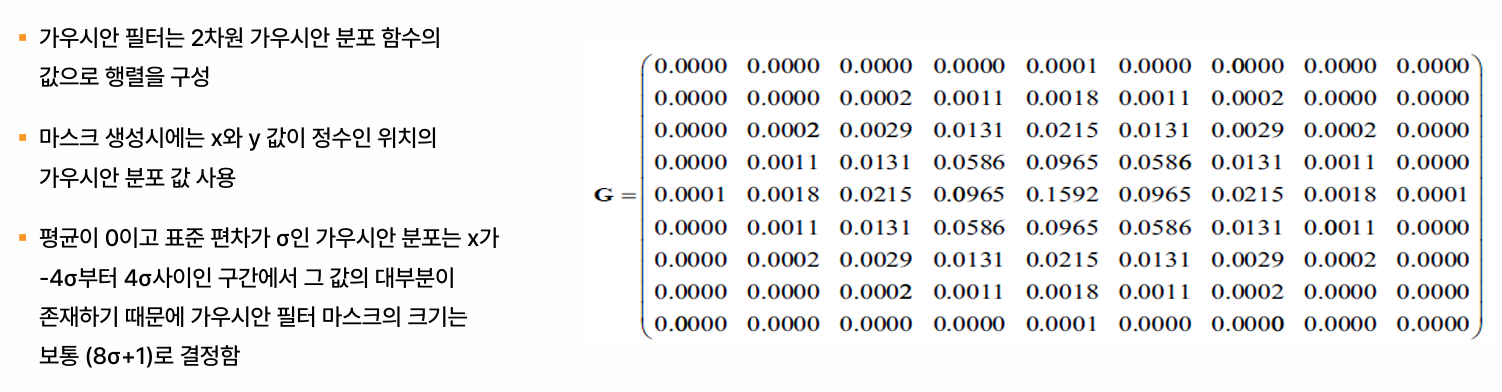
- cv2.GaussianBlur(src, ksize, sigmaX, dst = None, sigmaY = None, borderType = None)
    - src : 입력 영상
    - ksize : 가우시안 커널 크기
        - (0,0) 지정 : sigma 값 의해 자동 결정
    - sigmaX : x방향 sigma
    - dst : 출력 영상
    - sigmaY : y방향 sigma -> 0 설정 : sigmaX와 동일 설정
    - borderType : 가장자리 픽셀 확장 방식 

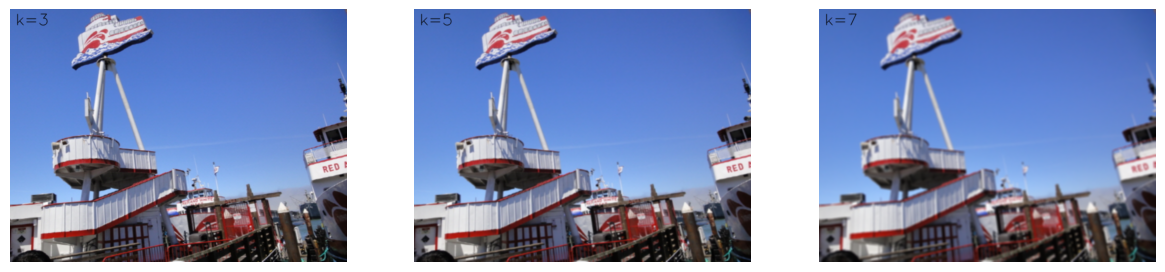

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./img/pier39.jpg')
plt.figure(figsize=(20, 5))

for i in range(1,4):
    k = i*2+1
    dst = cv2.GaussianBlur(img, (k, k), i-1)
    desc=f'k={k}'

    cv2.putText(dst, desc, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 0, 1, cv2.LINE_AA)
    index = 140+i
    plt.subplot(index)
    plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

# 샤프닝
- 영상을 뚜렷한 느낌이 나도록 변경
- 객체 윤곽이 잘 보이는 초점 잘맞은 느낌
- 디지털 영상 내 에지 부분 픽셀값 명암비 클수록 적용 효과 증가
<br><br>
- 언샤프 영상
    - 보다 효과적인 샤프닝 위해 영상 블러링 처리
    - 언샤프 마스크 필터(Unsharp Mask Filter) : 언샤프 영상 이용해 뚜렷한 영상 생성
<br><br>
- 언샤프 마스크 필터값
    - 기존 영상 픽셀 +(기존 영상 픽셀 - 가우시안 필터링 블러처리된 영상 픽셀)보다 효과적인 샤프닝 위해 영상 블러링 처리
    
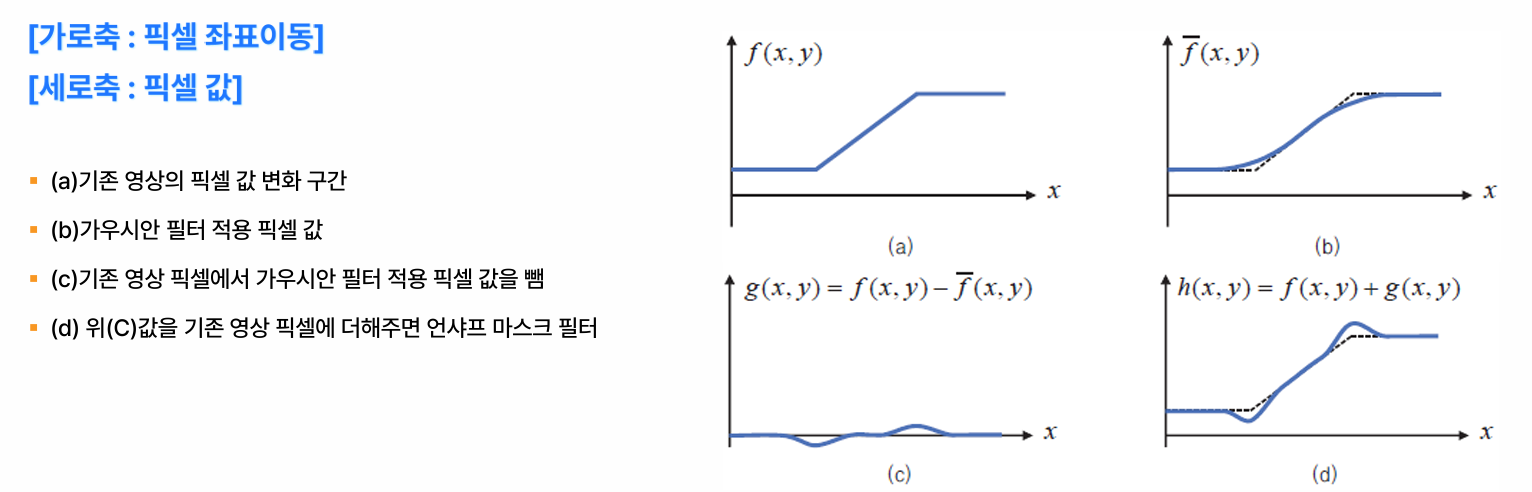

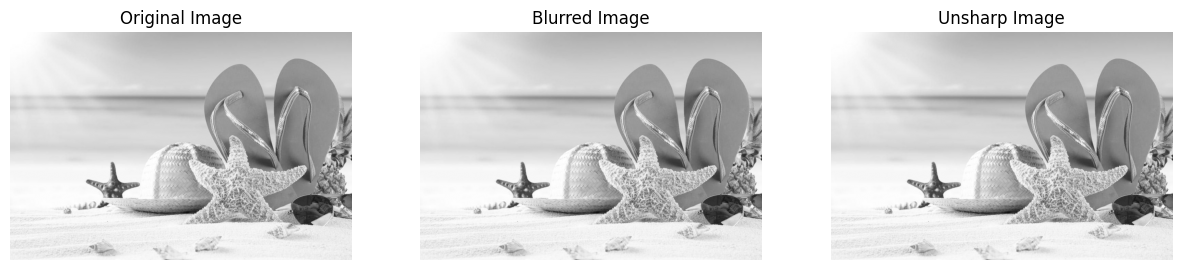

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./img/beach.jpg', cv2.IMREAD_GRAYSCALE)
blur= cv2.GaussianBlur(img, (5, 5), 0)
sharp= cv2.addWeighted(img, 1.5, blur, -0.5, 0)

plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(132), plt.imshow(img, cmap='gray'), plt.title('Blurred Image'), plt.axis('off')
plt.subplot(133), plt.imshow(img, cmap='gray'), plt.title('Unsharp Image'), plt.axis('off')
plt.show()

# 노이즈 제거
### 잡음 필터링
- 잡음 : 원본 신호에 추가된 원치 않은 정상적으로 생성되지 않은 신호
- 디지털 영상의 경우, 광학적 신호에서 전기적 신호로 변환시 잡음 발생
- 잡음 모델 : 잡음 생성 방식
<br><br>

### 잡음 필터
##### 1) 양방향 필터(Bilateral Filter)
- 가우시안 잡음 제거시 에지 성분 그대로 유지하면서 필터링 수행
- 픽셀 색상, 공간적 거리 고려하여 필터링
- 이미지 경계 유지 및 노이즈 효과적 감소
    - 에지 보존 : 일반적 블러링 기법과 달리 에지 보존하면서 필터링 수행
    - 비선형 필터 : 필터링 과정에서 픽셀값과 주변 픽셀값 동시 고려
- cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace, dst = None, borderType = None)
    - src : 입력 영상 (8비트 or 실수형) -> 1채널 or 3채널
    - d : 필터링에 사용될 이웃 픽셀거리(지름) -> 음수 입력 시, sigmaSpace 값에 의해 자동 결정
    - sigmaColor : 색 공간에서 필터의 표준 편차
    - sigmaSpace : 좌표 공간에서 필터의 표준 편차
    - dst : 출력 영상
    - borderType : 가장자리 픽셀 처리 방식

In [7]:
import cv2

src=cv2.imread('./img/beach.jpg',cv2.IMREAD_GRAYSCALE)
dst=cv2.bilateralFilter(src,-1,10,5)

cv2.imread('src',src)
cv2.imread('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

##### 2) 미디언 필터(Median Filter)
- 입력 영상에서 자기 자신 픽셀과 주변 픽셀값 중 중간값 선택하여 결과 영상 픽셀값으로 설정
- 내부에서 픽셀값 정렬 과정 진행 후, 정렬된 픽셀값 중 중간값 선택하여 반영
- 잡음 픽셀값이 주변 픽셀값과 차이 클수록 효과적
- cv2.medianBlur(src, ksize, dst = None)
    - src : 입력 영상
    - ksize :  커널 크기 -> 1보다 큰 홀수 지정
    - dst : 출력 영상
<br><br>
- 장점
    - 에지 보존 : 다른 블러링 필터에 비해 에지 보존률 높음
    - 노이즈 제거 : 소금-후추 노이즈 제거에 효과적
- 단점
    - 높은 계산 비용 : 각 커널 내 픽셀값 정렬 위해 많은 연산량 필요
    - 실시간 처리에 부적합

In [18]:
import cv2

src=cv2.imread('./img/median.jpg')
dst=cv2.medianBlur(src, 5)

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

# 기하학적 변환

### 기하학적 변환(geometric transform)
- 디지털 영상의 픽셀의 배치 구조를 변경하여 영상의 전체적인 모양을 변화하는 기능
    - 픽셀값 그대로 유지하면서 좌표 변경
    - 입력 영상 픽셀의 x, y 좌표 출력 -> 출력 영상에서 새로운 좌표 x', y' 변환
    - $x'=f1(x,y) \text{,}\space y'=f2(x,y)$
<br><br><br>

### 어파인 변환(affine transformation)
- 영상의 평행 이동, 회전, 크기, 전단 변환 등
    - 디지털 영상을 한쪽 방향으로 밀어서 변화
    - 어파인 변환 적용시에도 직선 형태, 직선 간 길이 비율, 평행 관계 유지
    - 전단 변환 시, 직사강형 형태 영상 -> 평행사변형으로 변형
<br><br><br>

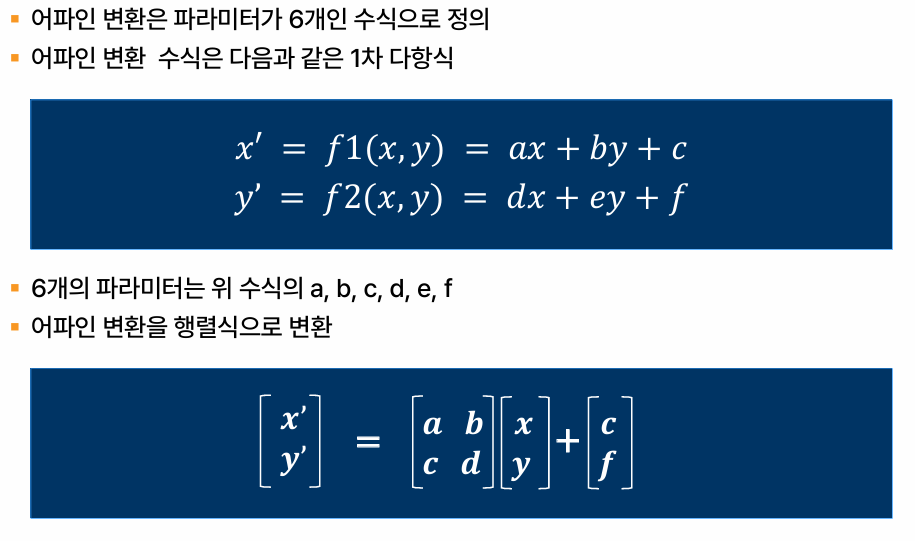
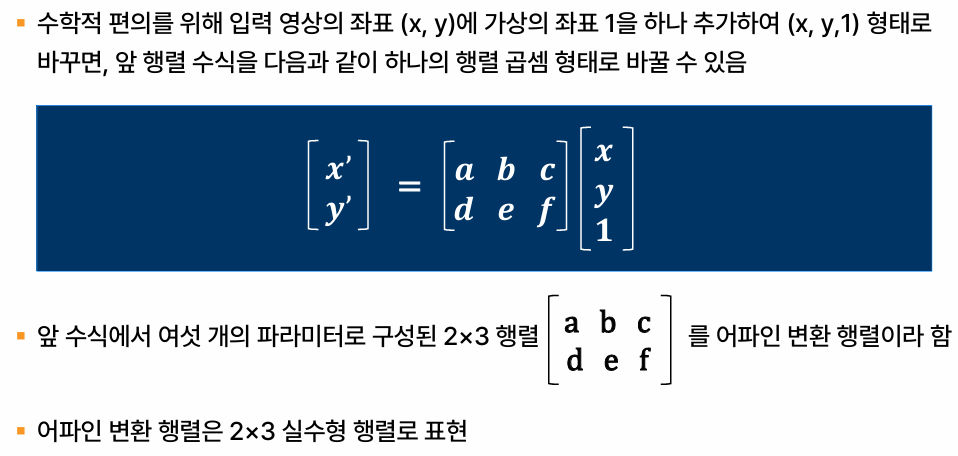
<br><br><br>

### 어파인 변환 예제
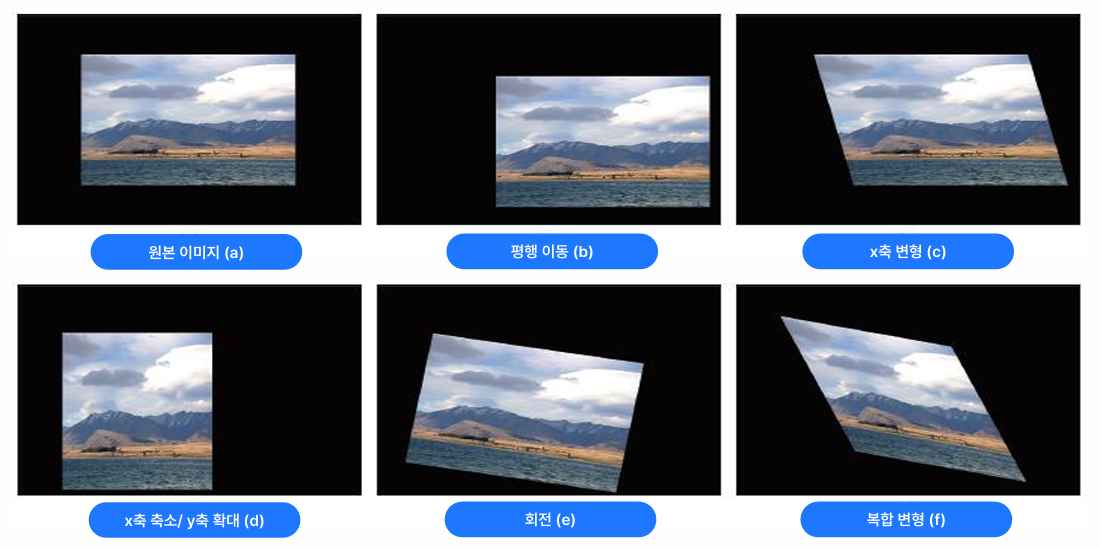
<br><br><br>

### 영상의 이동 변환(Translation transformation)
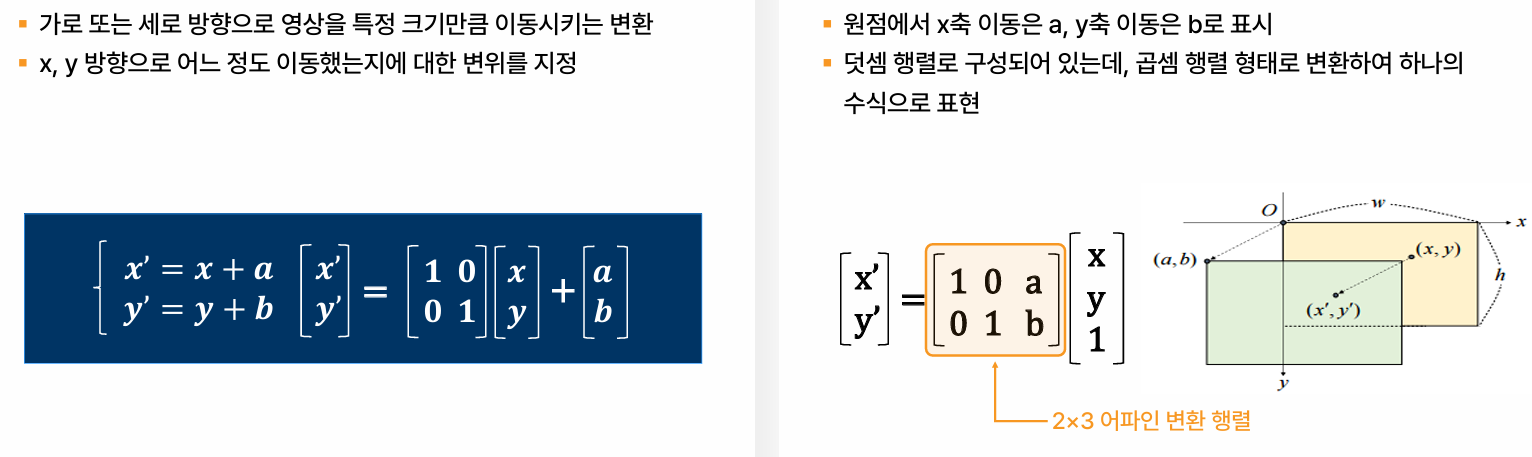
- cv2.warpAffine(src, M, dsize, dst = None, flags = None, borderMode = None, borderValue = None)
    - src : 입력 영상
    - M : 2 X 3 어파인 변환 행렬
    - dsize : 결과 영상 크기
    - dst : 출력 영상
    - flags : 보간법(기본값=cv2.INTER_LINEAR)
    - borderMode : 가장자리 픽셀 확장 방식(기본값=cv2.BORDER_CONSTANT)
    - borderValue : cv2.BORDER_CONSTANT일 때, 사용할 상수값(기본값=0)

In [10]:
import cv2
import numpy as np

src=cv2.imread('./img/scenery.jpg')
aff=np.array([[1,0,100],[0,1,100]],dtype=np.float32)
dst=cv2.warpAffine(src,aff,(0,0))

cv2.imshow('src',src)
cv2.imshow('aff',aff)
cv2.waitKey()
cv2.destroyAllWindows()

### 영상의 이동 변환
- 픽셀 이동 중, 일부 픽셀은 소폭 이동 or 대폭 이동하여 한쪽 찌그러트리는 효과

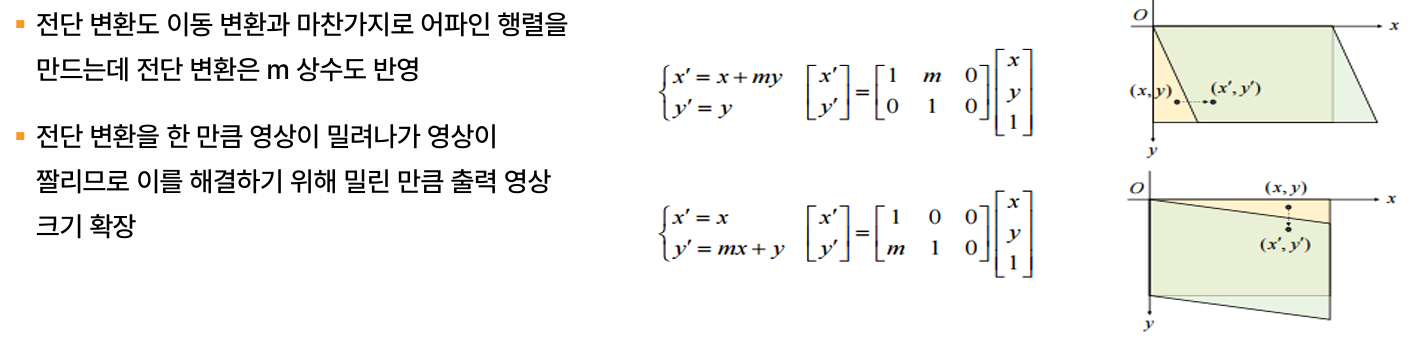

In [12]:
import cv2
import numpy as np

src=cv2.imread('./img/scenery.jpg')
aff=np.array([[1,0.5,0],[0,1,0]], dtype=np.float32)
h,w=src.shape[:2]
dst= cv2.warpAffine (src,aff, (w+int(h*0.5), h))

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 영상의 크기 변환

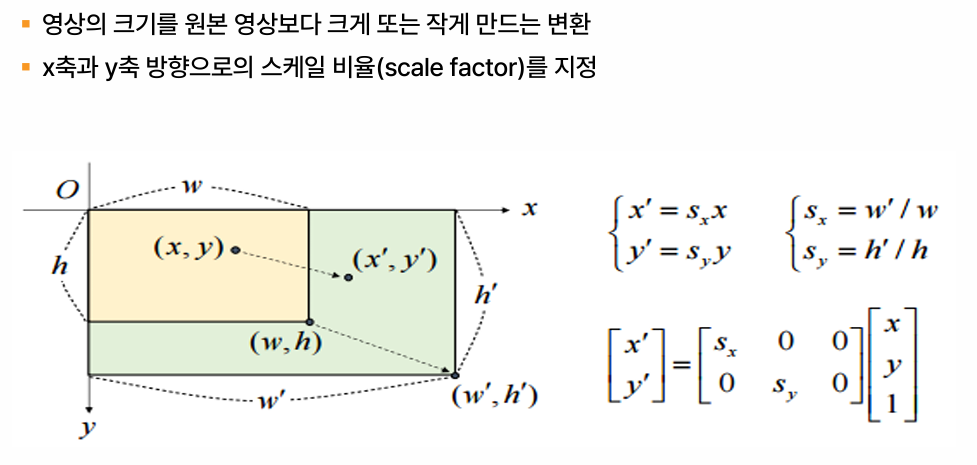
- cv2.resize(src, dsize, dst=None, fx = None, fy = None, interpolation = None)
    - src : 입력 영상
    - M : 2 X 3 어파인 변환 행렬
    - dsize : 결과 영상 크기
    - dst : 출력 영상
    - fx, fy : x, y 방향 스케일 비율 -> dsize값 0일 때 유효
    - interpolation : 보간법 지정(기본값=cv2.INTER_LINEAR)

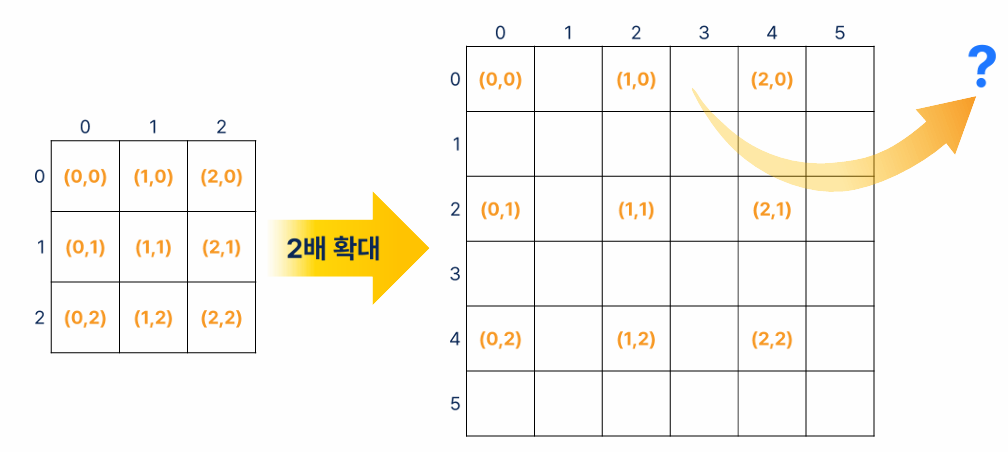
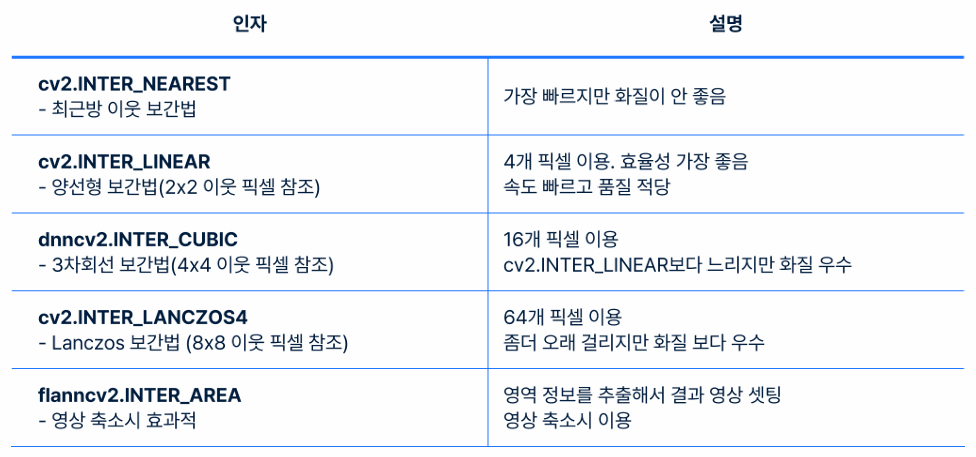

In [13]:
import cv2
import numpy as np
src=cv2.imread('./img/candies.png')
dst1 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2. INTER_NEAREST)
dst2 = cv2.resize(src, (1920, 1280))
dst3 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1 [500:900, 400:800])
cv2.imshow('dst2', dst2 [500:900, 400:800])
cv2.imshow('dst3', dst3 [500:900, 400:800])
cv2.imshow('dst4', dst4[500:900, 400:800])

cv2.waitKey()
cv2.destroyAllWindows()